In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.stats import norm
import seaborn as sns
#import globalfunctions

In [3]:
def cdf(data,label):
    # sort the data:
    data_sorted = np.sort(data)

    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)

    # plot the sorted data:
    fig = plt.figure()
    #ax1 = fig.add_subplot(121)
    #ax1.plot(p, data_sorted)
    #ax1.set_xlabel('$p$')
    #ax1.set_ylabel('$x$')

    #ax2 = fig.add_subplot(122)
    #ax2.plot(data_sorted, p)
    #ax2.set_xlabel('${}$'.format(label))
    #ax2.set_ylabel('$p$')
    return (pd.DataFrame({label:data_sorted,"probability":p}))

In [65]:
#https://github.com/psychhack2019/General-Social-Survey-Dataset/blob/master/GSS2018.zip
df=pd.read_csv("https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/GSS2018.csv")
for item in df.columns:
    print(item)
    
df['INCOME']=df['INCOME'].replace([98,99],np.nan)
df['HEIGHT']=df['HEIGHT'].replace([98,99],np.nan)
df['WEIGHT']=df['WEIGHT'].replace([98,99],np.nan)
df['AGE']=df['AGE'].replace([0,1,2,3,4,5,6,7,98,99],np.nan)

df = df.dropna(subset=['INCOME', 'HEIGHT','WEIGHT','AGE'])

#print(df[df["INCOME"]==98])

ABANY
ABDEFECT
ABFELEGL
ABHELP1
ABHELP2
ABHELP3
ABHELP4
ABHLTH
ABINSPAY
ABMEDGOV1
ABMEDGOV2
ABMELEGL
ABMORAL
ABNOMORE
ABPOOR
ABPOORW
ABRAPE
ABSINGLE
ABSTATE1
ABSTATE2
ACQNTSEX
ACTSSOC
ADULTS
ADVFRONT
AFFRMACT
AFRAIDOF
AFTERLIF
AGE
AGED
AGEKDBRN
ANCESTRS
ARTHRTIS
ASTROLGY
ASTROSCI
ATHEISTS
ATTEND
ATTEND12
ATTENDMA
ATTENDPA
AWAY1
AWAY11
AWAY2
AWAY3
AWAY4
AWAY5
AWAY6
AWAY7
BABIES
BACKPAIN
BALLOT
BALNEG
BALPOS
BEFAIR
BETRLANG
BIBLE
BIGBANG
BIGBANG1
BIGBANG2
BIRD
BIRDB4
BORN
BOYORGRL
BREAKDWN
BUDDHSTS
BUYESOP
BUYVALUE
CANTRUST
CAPPUN
CAT
CATB4
CHARACTR
CHEMGEN
CHILDS
CHLDIDEL
CHRISTNS
CHURHPOW
CLASS
CLERGVTE
CLOSETO1
CLOSETO2
CLOSETO3
CLOSETO4
CLOSETO5
CNTCTFAM
CNTCTFRD
CNTCTKID
CNTCTPAR
CNTCTSIB
CODEG
CODEN
COEDUC
COEVWORK
COFUND
COHORT
COHRS1
COHRS2
COIND10
COISCO08
COJew
COLATH
COLCOM
COLDEG1
COLHOMO
COLMIL
COLMSLM
COLRAC
COLSCI
COLSCINM
COMFORT
COMPANY
COMPPERF
COMPREND
COMPUSE
COMPWAGE
CONARMY
CONBIZ
CONBUS
CONCHURH
CONCLERG
CONCONG
CONCOURT
CONDEMND
CONDOM
CONDRIFT
CONEDUC
CONF2F
CONF

0.0       2
1.0       1
2.0       4
3.0       8
4.0       5
5.0       1
6.0      18
7.0       8
8.0      31
9.0      47
10.0     64
11.0     86
12.0    615
13.0    171
14.0    295
15.0    123
16.0    407
17.0     91
18.0    116
19.0     44
20.0     68
Name: EDUC, dtype: int64


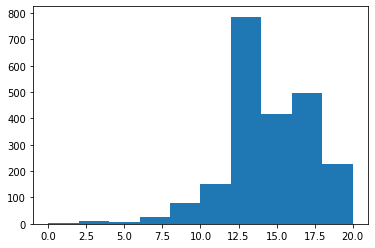

In [66]:
education=df["EDUC"].astype(float)
education=education.replace([98,99],np.nan)
plt.hist(education.dropna(),label='education',bins=10)
print(education.value_counts().sort_index())



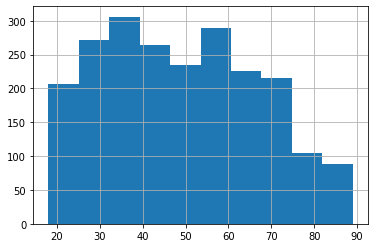

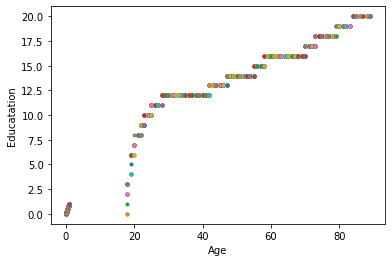

In [67]:
age=df["AGE"]
age=age.replace([0,1,2,3,4,5,6,7,98,99],np.nan)

def ecdf(data):
    #Compute ECDF for a one-dimensional array of measurements.
    # Number of data points: n
    n =len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

x_age=ecdf(age)
y_educ=ecdf(education)

age.hist()
plt.show()

plt.plot(x_age, y_educ, marker='.', linestyle='none')
plt.xlabel("Age")
plt.ylabel("Educatation")
plt.show()

In [68]:

    
probabilities=cdf(age,"age")    
#probabilities.reset_index()

#for key,value in probabilities.iterrows():
#    print(key,value)
print(probabilities[probabilities["age"]==50].mean())

age            50.000000
probability     0.524036
dtype: float64


<Figure size 432x288 with 0 Axes>

Text(0, 0.5, '$p$')

<Figure size 432x288 with 0 Axes>

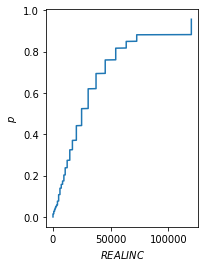

In [69]:
income=df["REALINC"]
income=income.replace([0,1,2,3,4,5,6,7,98,99],np.nan)
accum_df=cdf(income,"REALINC")

fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.plot(accum_df["REALINC"], accum_df["probability"])
ax2.set_xlabel('$REALINC$')
ax2.set_ylabel('$p$')

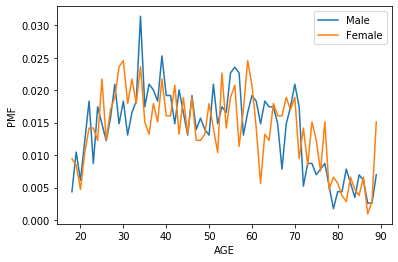

In [70]:
def Pmf(data,label):
    total_count=data.count()
    return_df=data.value_counts().rename_axis(label).reset_index(name='Counts')
    return_df["probability"]=return_df["Counts"]/total_count
    return_df=return_df.sort_values(by=label)
    return return_df
    

#print(df["GENDER1"])
male=df["GENDER1"]==1

male_age=age[male]
female_age=age[~male]

male_age_proba=Pmf(male_age,"AGE")
female_age_proba=Pmf(female_age,"AGE")

plt.plot(male_age_proba["AGE"],male_age_proba["probability"])
plt.plot(female_age_proba["AGE"],female_age_proba["probability"])
plt.legend(["Male","Female"])
plt.xlabel("AGE")
plt.ylabel("PMF")
plt.show()


Text(0, 0.5, '$p$')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

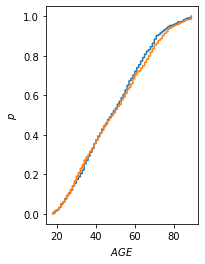

In [71]:
male_age_df=cdf(male_age,"AGE")
female_age_df=cdf(female_age,"AGE")
fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.plot(male_age_df["AGE"], male_age_df["probability"])
ax2.plot(female_age_df["AGE"], female_age_df["probability"])
ax2.set_xlabel('$AGE$')
ax2.set_ylabel('$p$')


[2018]


Text(0, 0.5, '$p$')

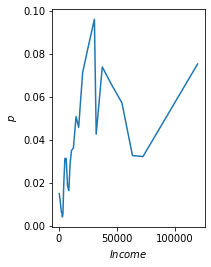

In [88]:
real_income=df["REALINC"]
filter=df["YEAR"]==2018
print(df["YEAR"].unique())

avg_income=real_income.mean()
real_income=real_income.replace(np.nan,avg_income)
real_income=real_income.replace(0,avg_income)


real_income_df=Pmf(real_income[filter],"REALINC")

fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.plot(real_income_df["REALINC"], real_income_df["probability"])
ax2.set_xlabel('$Income$')
ax2.set_ylabel('$p$')

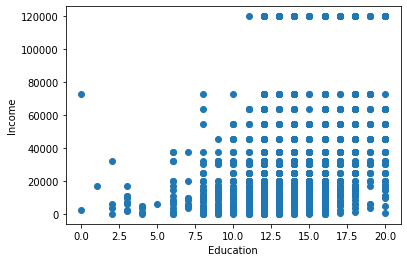

High School or less education 0.40344514959202177
Batchelor Count= 726
Associate Count= 418
High school or less= 890
Total Count 2205
High school or less percentage 0.4036281179138322


Text(0, 0.5, '$p$')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

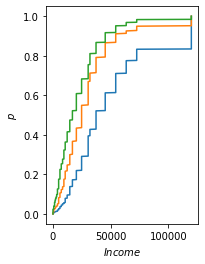

In [104]:
plt.scatter(education,real_income)
plt.xlabel("Education")
plt.ylabel("Income")
plt.show()

print("High School or less education", df[df["EDUC"]<=12]["EDUC"].count()/df["EDUC"].count())


bachelor= (education>=16)
associate=(education>=14) & (education<16)
highschool=(education<=12)

print("Batchelor Count=", education[bachelor].count())
print("Associate Count=", education[associate].count())
print("High school or less=", education[highschool].count())
print("Total Count",education.count())
print("High school or less percentage",education[highschool].count()/education.count())



bachelor_income_df=cdf(real_income[bachelor],"REALINC")
associate_income_df=cdf(real_income[associate],"REALINC")
highschool_income_df=cdf(real_income[highschool],"REALINC")
#female_age_df=cdf(female_age,"AGE")
fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.plot(bachelor_income_df["REALINC"], bachelor_income_df["probability"],label="Bachelor")
ax2.plot(associate_income_df["REALINC"], associate_income_df["probability"],label="Associate")
ax2.plot(highschool_income_df["REALINC"], highschool_income_df["probability"],label="Associate")

ax2.set_xlabel('$Income$')
ax2.set_ylabel('$p$')


kernel density closely approximates the guassian distribution
the kde matches closely the pdf


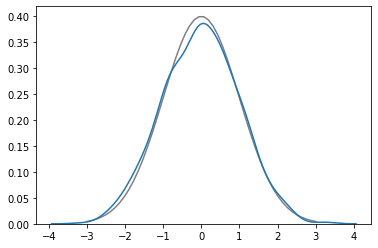

kde distribution for education, income, and age


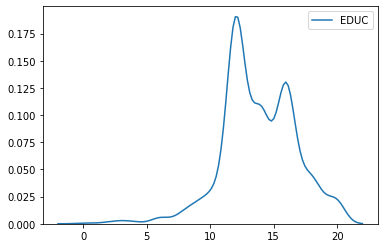

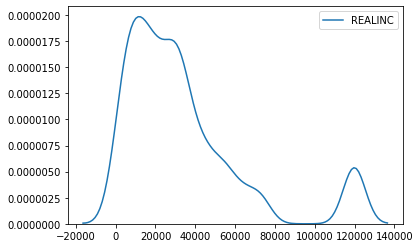

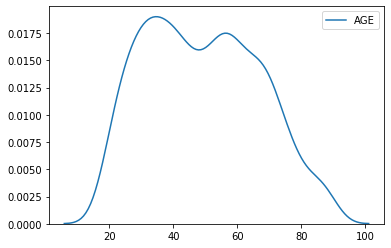

In [91]:
print("kernel density closely approximates the guassian distribution")
sample= np.random.normal(size=1000)

xs=np.linspace(-3,3)
ys=norm(0,1).pdf(xs)

print("the kde matches closely the pdf")
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)
plt.show()

print("kde distribution for education, income, and age")
sns.kdeplot(education)
plt.show()
sns.kdeplot(real_income)
plt.show()
sns.kdeplot(age)
plt.show()

compare distribution of log 10 of income with the cdf of income


<Figure size 432x288 with 0 Axes>

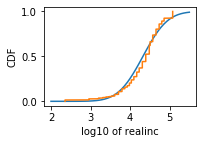

In [92]:
print ("compare distribution of log 10 of income with the cdf of income")
log_income=np.log10(real_income)

mean=log_income.mean()
std=log_income.std()

xs = np.linspace(2, 5.5)
ys = norm(mean,std).cdf(xs)

# Plot the model CDF
#plt.clf()
#plt.plot(xs, ys, color='gray')

#log_income.plot()
log_income_df=cdf(log_income,"REALINC")

fig = plt.figure()
ax2 = fig.add_subplot(222)
ax2.plot(xs, ys)
ax2.plot(log_income_df["REALINC"], log_income_df["probability"])

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

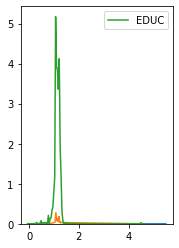

In [93]:
avg_education=education.mean()
education=education.replace(np.nan,avg_income)
education=education.replace(0,avg_income)
log_education=np.log10(education)

mean=log_education.mean()
std=log_education.std()

xs = np.linspace(2, 5.5)
ys = norm(mean,std).pdf(xs)

log_education_df=Pmf(log_education,"EDUC")

fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.plot(xs, ys)
ax2.plot(log_education_df["EDUC"], log_education_df["probability"])
education=df["EDUC"].astype(float)
education=education.replace([98,99],np.nan)
sns.kdeplot(log_education)

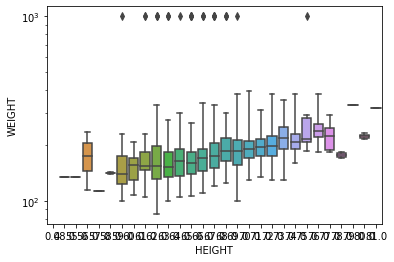

In [77]:
height=df["HEIGHT"].astype(float)
height=height.replace([98,99],np.nan)

weight=df["WEIGHT"].astype(float)
weight=weight.replace([98,99],np.nan)

sns.boxplot(x=height, y=weight, data=df, whis=10)
plt.yscale("log")
plt.show()

probability distribution of the income categories


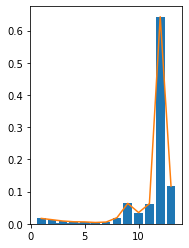

0       13.0
1       12.0
2       12.0
3       13.0
4       13.0
        ... 
2343    13.0
2344    12.0
2345    12.0
2346    12.0
2347    13.0
Name: INCOME, Length: 2206, dtype: float64


In [78]:
print("probability distribution of the income categories")
income=df["INCOME"]
income=income.replace([98,99],np.nan)

income_df=Pmf(income,"INCOME")


fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.plot(xs, ys)
ax2.bar(income_df["INCOME"], income_df["probability"])
ax2.plot(income_df["INCOME"], income_df["probability"])

plt.show()

print(income)




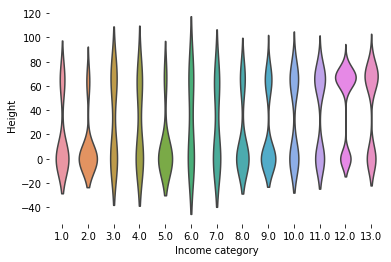

In [79]:
# Make a violin plot

sns.violinplot(x="INCOME",y="HEIGHT",data=df,inner=None)
# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income category')
plt.ylabel('Height')
plt.show()




In [80]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)
#covariance/(std of x)*(std of y)
    # Return entry [0,1]
    return corr_mat[0,1]

In [86]:

print("pearon_r weight to height",pearson_r(height,weight))
print("pearon_r age to weight",pearson_r(age,weight))


0       14.0
1       10.0
2       16.0
3       16.0
4       18.0
        ... 
2343    12.0
2344    12.0
2345    12.0
2346    16.0
2347    12.0
Name: EDUC, Length: 2206, dtype: float64
pearon_r weight to height 0.7139188029402526
pearon_r age to weight -0.2423576332247682
